<a href="https://www.kaggle.com/code/rodolphojustino/analysis-of-immigration-to-from-1980-to-2013?scriptVersionId=120119567" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Author: Rodolpho Justino
## Data Analyst / Data Scientist


An exploratory data analysis of the db will be performed along with some insights to be taken.

This dataset is a compilation of international immigrant flows (in or out) from different countries to canada, and can be retrieved [here](https://www.kaggle.com/datasets/danishasif/canada-immigratation).

The data was gathered by the United Nations and has informations about 45 coutries.

The first step is to load some libraries that will be used on the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

!pip3 install folium==0.5.0
import folium

%matplotlib inline

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76133 sha256=f449fa40956995b48e7d6e5463f93aeb51055ce606f51c63ebc07a9cc3ad4b9a
  Stored in directory: /root/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.14.0
    Uninstalling folium-0.14.0:
      Successfully uninstalled folium-0.14.0


In [2]:
df = pd.read_excel("/kaggle/input/canada-immigration-dataset/Canada.xlsx",
sheet_name = "Canada by Citizenship", skiprows = range (20), skipfooter = 2)

df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Some information on the dataset probably won't be used, such as AREA, REG, DEV, so, we can drop these specific columns

In [3]:
df.drop(["AREA", "REG", "DEV"], axis = 1, inplace = True)
df.head()

,Type,Coverage,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Some columns can also be renamed, such as OdName, AreaName, RegName

In [4]:
df.rename(columns = {"OdName":"Country", "AreaName":"Continent", "RegName":"Region"}, inplace = True)
df.head()

,Type,Coverage,Country,Continent,Region,DevName,1980,1981,1982,1983,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Checking for nulls in the DF

In [5]:
df.isnull().sum()

Type         0
Coverage     0
Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
dtype: int64

In [6]:
df.set_index("Country", inplace = True)

In [7]:
df["Total"] = df.sum(axis = 1)
df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Type,Coverage,Continent,Region,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,Asia,Southern Asia,Developing regions,16,39,39,47,71,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Immigrants,Foreigners,Europe,Southern Europe,Developed regions,1,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Immigrants,Foreigners,Africa,Northern Africa,Developing regions,80,67,71,69,63,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Immigrants,Foreigners,Oceania,Polynesia,Developing regions,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Immigrants,Foreigners,Europe,Southern Europe,Developed regions,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Immigrants,Foreigners,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Immigrants,Foreigners,Africa,Northern Africa,Developing regions,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Immigrants,Foreigners,Asia,Western Asia,Developing regions,1,2,1,6,0,...,161,140,122,133,128,211,160,174,217,2985


In [8]:
df.loc["Brazil"]

Type                              Immigrants
Coverage                          Foreigners
Continent    Latin America and the Caribbean
Region                         South America
DevName                   Developing regions
1980                                     211
1981                                     220
1982                                     192
1983                                     139
1984                                     145
1985                                     130
1986                                     205
1987                                     244
1988                                     394
1989                                     650
1990                                     650
1991                                     877
1992                                    1066
1993                                     866
1994                                     566
1995                                     572
1996                                     586
1997      

In [9]:
df.columns = list(map(str, df.columns))
years = list(map(str, range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [10]:
Brazil = df.loc["Brazil", years]
Brazil.head()

1980    211
1981    220
1982    192
1983    139
1984    145
Name: Brazil, dtype: object

Text(0.5, 0, 'Year')

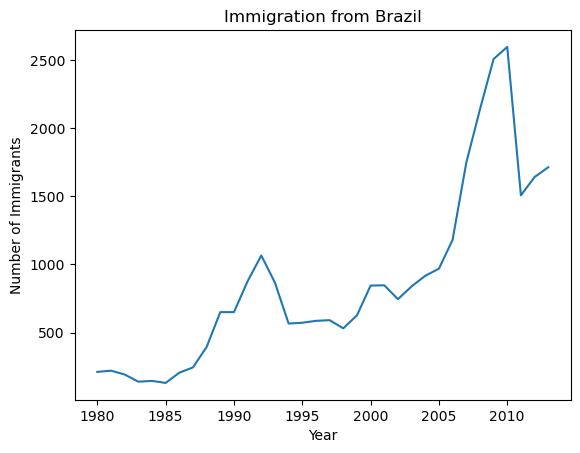

In [11]:
Brazil.plot()
plt.title ("Immigration from Brazil")
plt.ylabel("Number of Immigrants")
plt.xlabel("Year")

## Investigating the contribution of the top 5 countries along the years

In [12]:
df.sort_values(["Total"], ascending = False, axis = 0, inplace = True)
df_top5 = df.head()

df_top5

,Type,Coverage,Continent,Region,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Immigrants,Foreigners,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Immigrants,Foreigners,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Immigrants,Foreigners,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Immigrants,Foreigners,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Immigrants,Foreigners,Asia,Southern Asia,Developing regions,978,972,1201,900,668,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [13]:
df_top5_t = df_top5[years].transpose()
df_top5_t

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


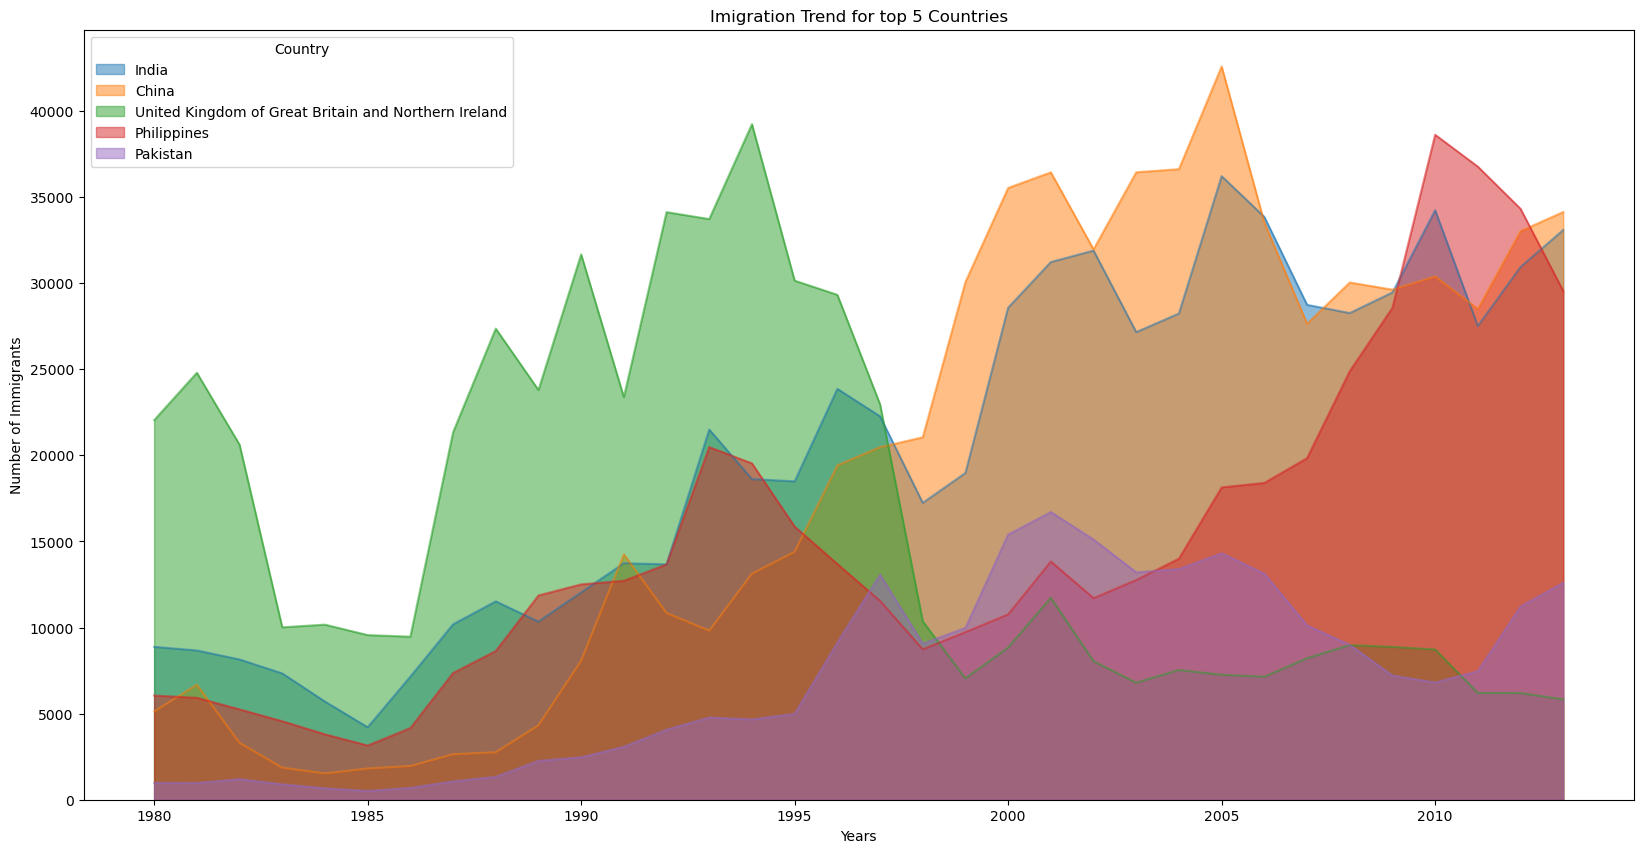

In [14]:
df_top5_t.index = df_top5_t.index.map(int)

ax = df_top5_t.plot(kind = "area", stacked = False, figsize = (20,10))

ax.set_title ("Imigration Trend for top 5 Countries")
ax.set_xlabel("Years")
ax.set_ylabel("Number of Immigrants")

plt.show()

## Using an histogram to check the distribution of top 5 Countries from 1980 to 2013

Text(0.5, 0, 'Number of Immigrants')

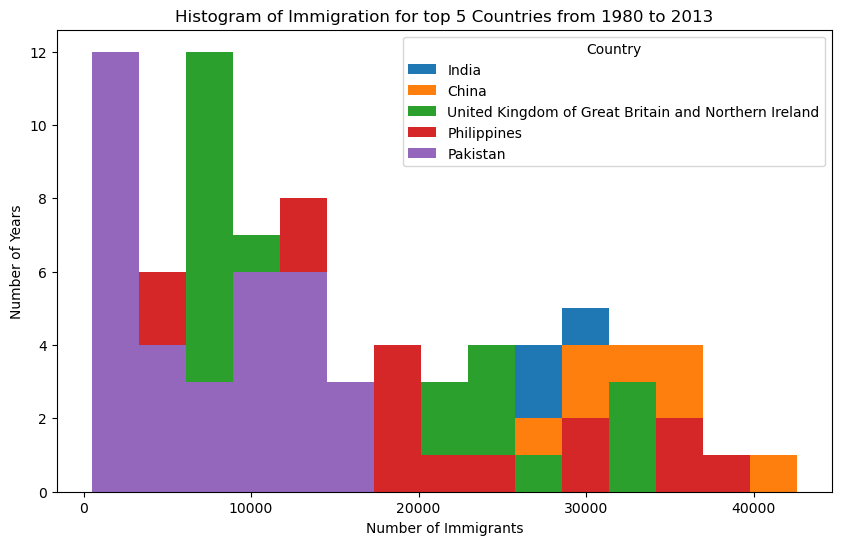

In [15]:
df_top5_t.plot(kind = 'hist', figsize = (10,6),
            bins = 15)
plt.title ("Histogram of Immigration for top 5 Countries from 1980 to 2013")
plt.ylabel("Number of Years")
plt.xlabel("Number of Immigrants")

We see that, with the ammount of information, the histogram does not look well, we would need to use another type of graph for the analysis

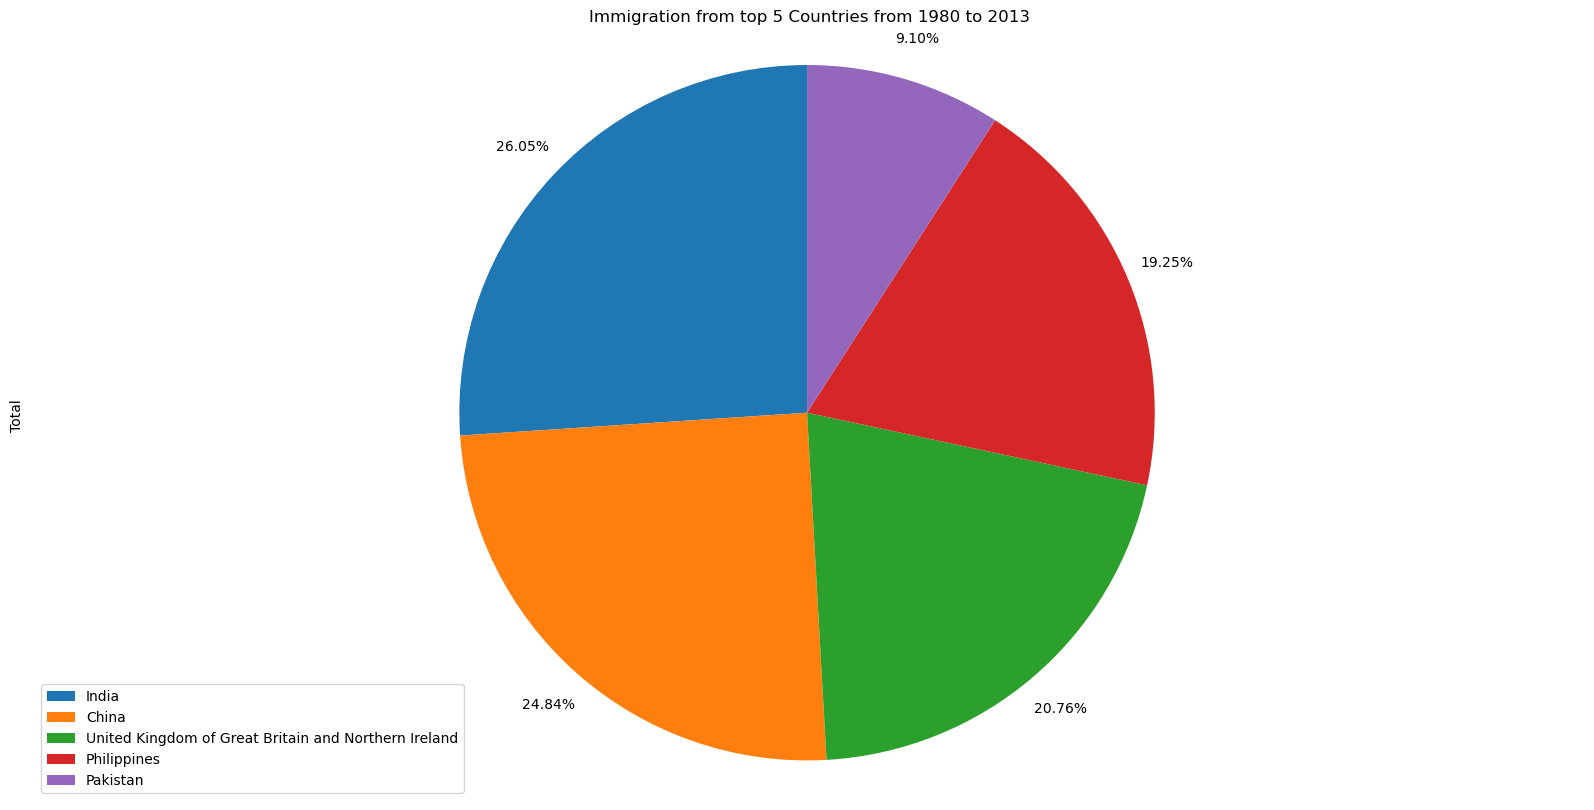

In [16]:
df_top5["Total"].plot(kind = "pie",
                     figsize = (20,10),
                     autopct = "%1.2f%%", startangle = 90,
                     shadow = False, labels = None, pctdistance = 1.12,
                     )
plt.title("Immigration from top 5 Countries from 1980 to 2013")
plt.legend(labels = df_top5.index, loc = "lower left")
plt.axis("equal")
plt.show()

## Now, from a different graph we can extract informations like:

- ~ 50% of the total immigrants from the top 5 Countries come from China and India
- Despite having 1/4 of Pakistan's population, United Kingdom's immigrants are close to double the ammount to Canada among the years

## We can use the information above to check further informations about china and India immigration to Canada

In [17]:
df_CI = df.loc[["China","India"], years].transpose()
df_CI

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704
1985,1816,4211
1986,1960,7150
1987,2643,10189
1988,2758,11522
1989,4323,10343


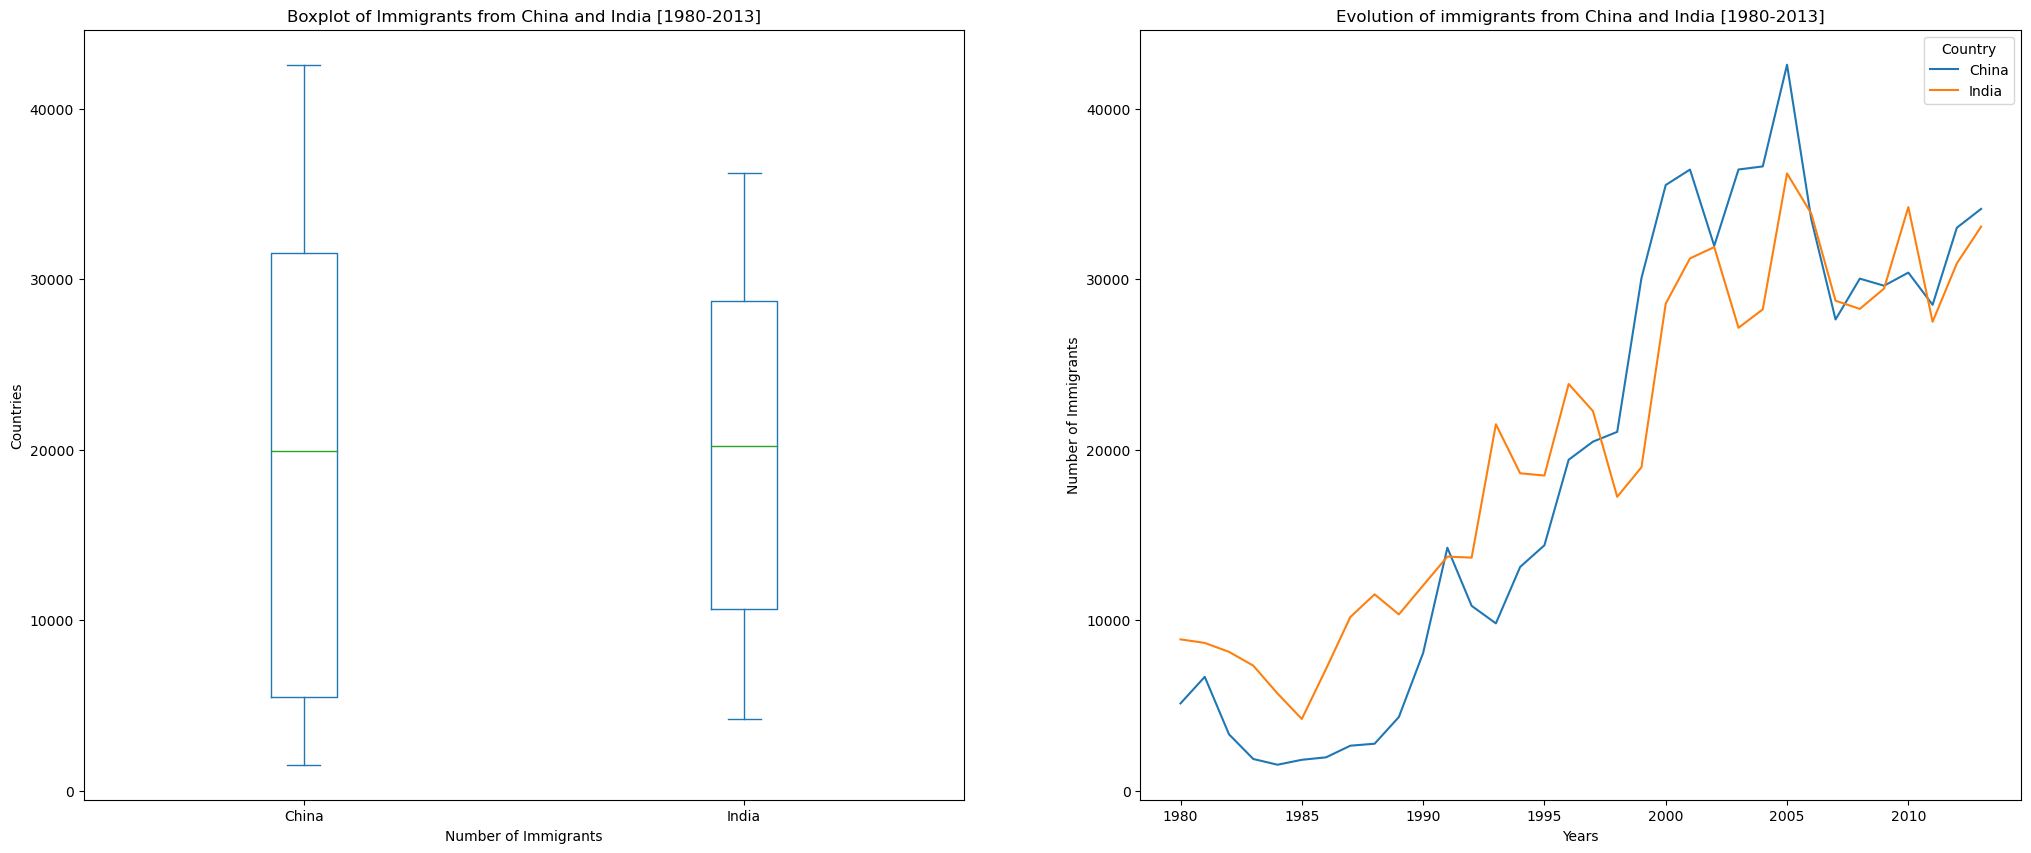

In [18]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1) #1 row, 2 columns, first plot
ax1 = fig.add_subplot(1,2,2)

#First Subplot: Box Plot

df_CI.plot(kind = "box", vert = True, figsize = (25,10), ax = ax0)
ax0.set_title ("Boxplot of Immigrants from China and India [1980-2013]")
ax0.set_xlabel("Number of Immigrants")
ax0.set_ylabel("Countries")

#Second Subplot: Line Plot
df_CI.plot(kind = "line", figsize = (25,10), ax = ax1)
ax1.set_title ("Evolution of immigrants from China and India [1980-2013]")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of Immigrants")

plt.show()

From both graphs we can see:

- The boxplot shows how the data is distributed, both china and India have about the same median (~20000), although, China's immigration data shows that the values are more spread along the years, whereas for India, it has a smaller dispersion

- The line plot shows how the immigration from both countries have evolved throughout the years, and that from 2000 on, we see a great increase in the amount, with a slight decrease in 2007

## Investigating Immigration by continents and Regions

In [19]:
df_continents = df.groupby("Continent", axis = 0).sum()
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


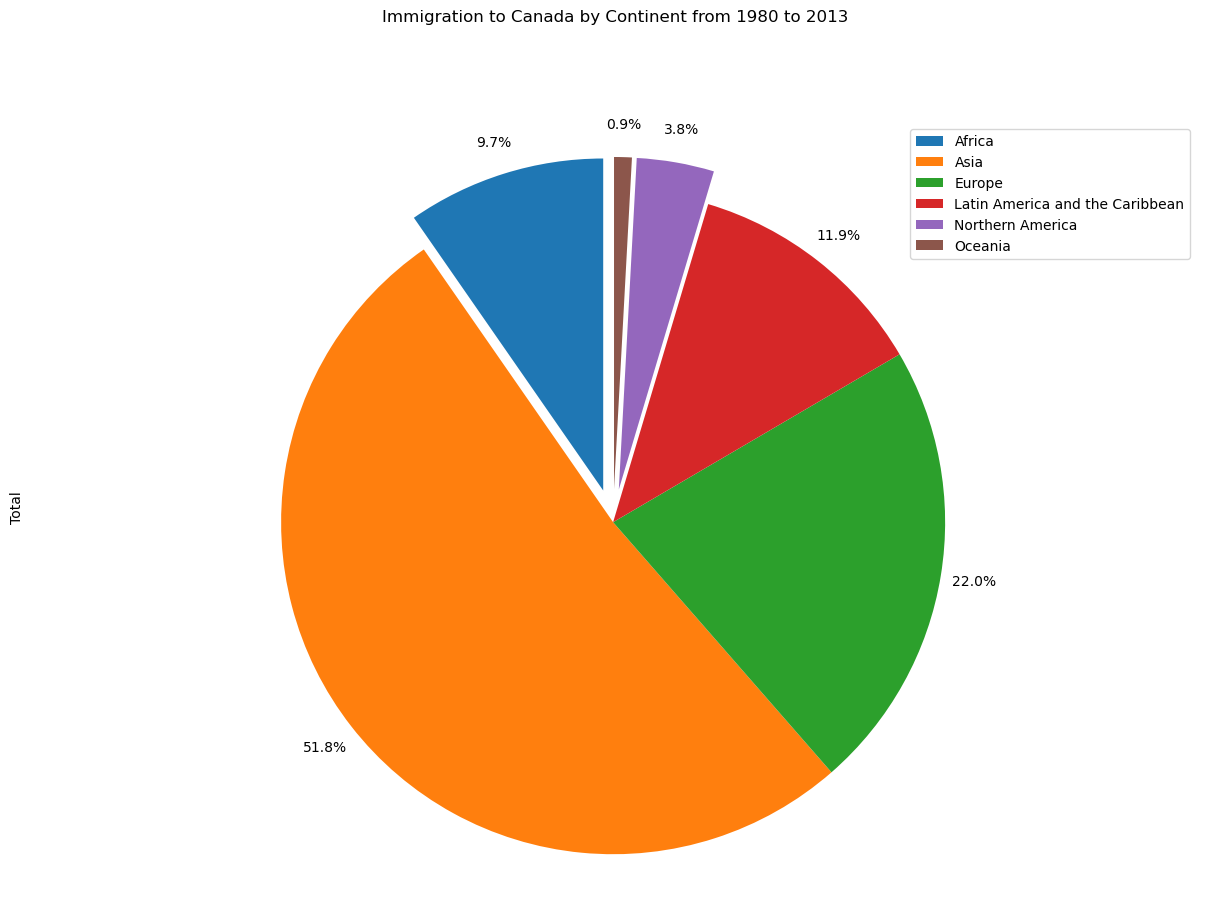

In [20]:
explode_list = [0.1,0,0,0,0.1,0.1]    
df_continents["Total"].plot(kind = "pie",
                     figsize = (15,10),
                     autopct = "%1.1f%%", startangle = 90, labels = None,
                    pctdistance = 1.1, explode = explode_list,
                     shadow = False)
plt.title("Immigration to Canada by Continent from 1980 to 2013", y = 1.12)
plt.axis("equal")
plt.legend(labels = df_continents.index)
plt.show()

In [21]:
df_region = df.groupby("DevName", axis = 0).sum()
df_region

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
DevName,,,,,,,,,,,,,,,,,,,,,
Developed regions,51143,56707,53240,32504,29675,28052,32224,55500,62129,68967,...,46695,45071,45591,47664,46805,44158,36946,39682,39712,1714011
Developing regions,47994,53856,51031,43046,43742,41926,53824,79271,77177,95465,...,210762,201986,186814,195383,201963,232798,209248,216540,217825,4695142


## Exploring which type of regions have the highest ammount of immigrants

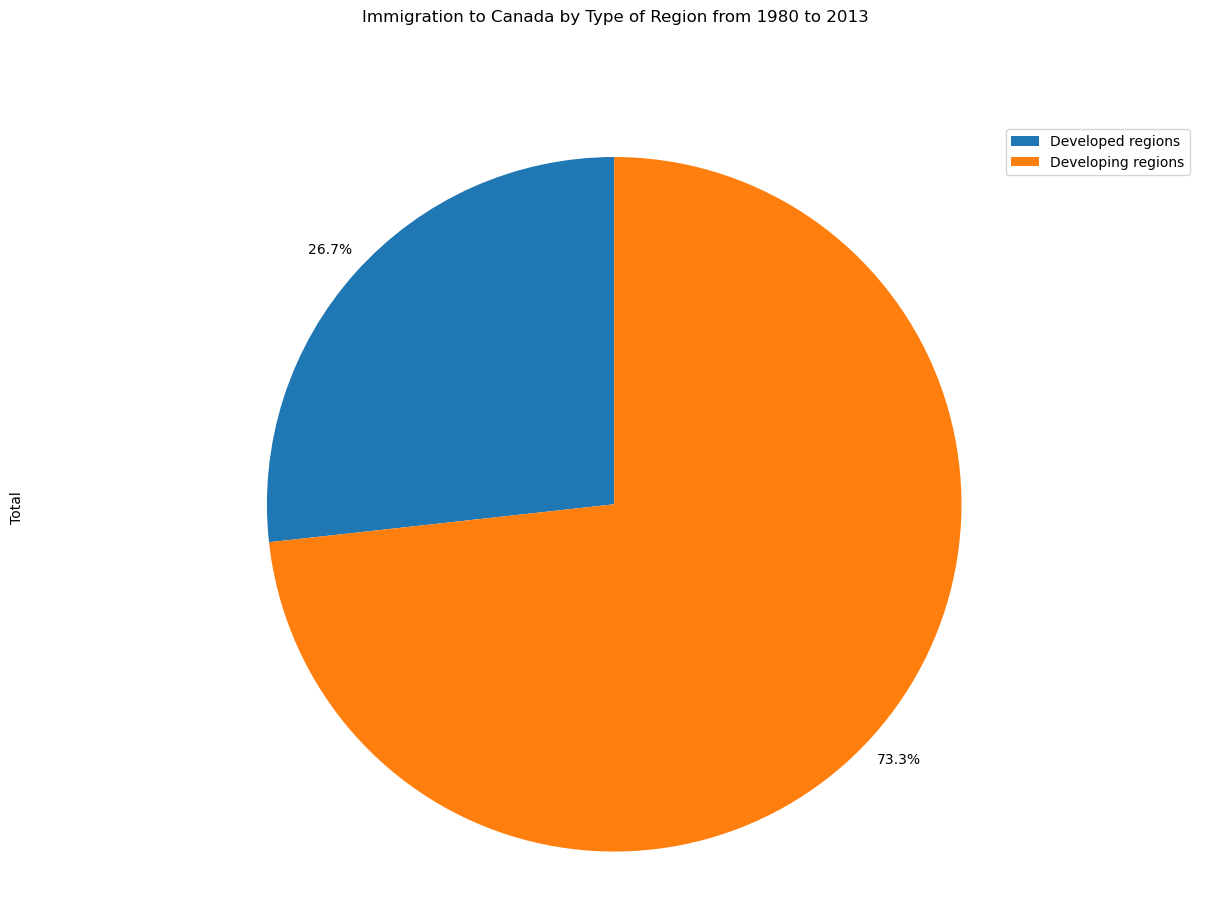

In [22]:
df_region["Total"].plot(kind = "pie",
                     figsize = (15,10),
                     autopct = "%1.1f%%", startangle = 90, labels = None,
                    pctdistance = 1.1,
                     shadow = False)
plt.title("Immigration to Canada by Type of Region from 1980 to 2013", y = 1.12)
plt.axis("equal")
plt.legend(labels = df_region.index)
plt.show()

From the Pie chart we can check that from 1980 to 2013, over 73% of the immigrants were from Developing regions

## Using different Visualizations and Graphs for our exploratory data analysis

### Here, we want to see how the data evolves throughout the years, in total immigration terms

In [23]:
df_total = pd.DataFrame(df[years].sum(axis = 0))

#The change to int type, so the regression analysis is easier
df_total.index = map(int, df_total.index)

df_total.reset_index(inplace = True)

df_total.columns = ["year", "total"]

df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


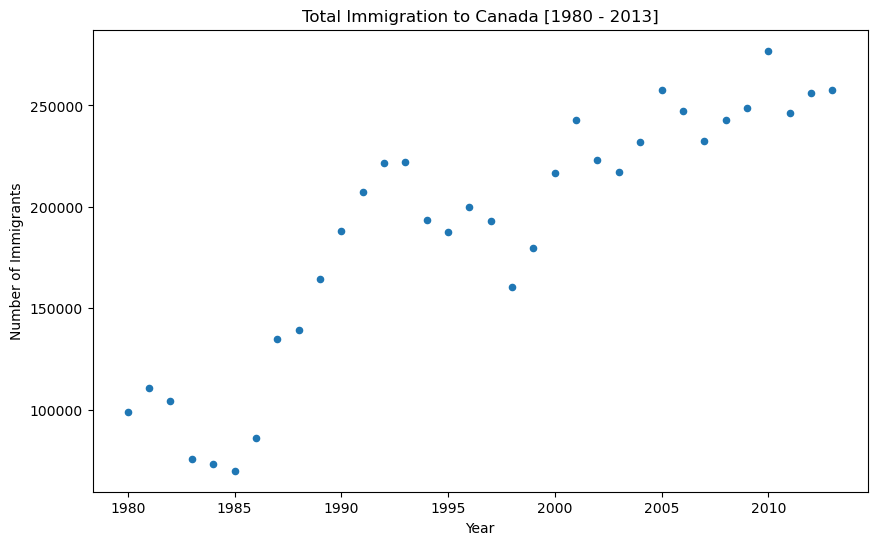

In [24]:
df_total.plot(kind = "scatter", x = "year", y = "total", figsize = (10,6))

plt.title ("Total Immigration to Canada [1980 - 2013]")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

plt.show()

An evident ascending trend is revealed, and we can confirm that the immigration has been increasing along the years

(0.0, 307276.8743668812)

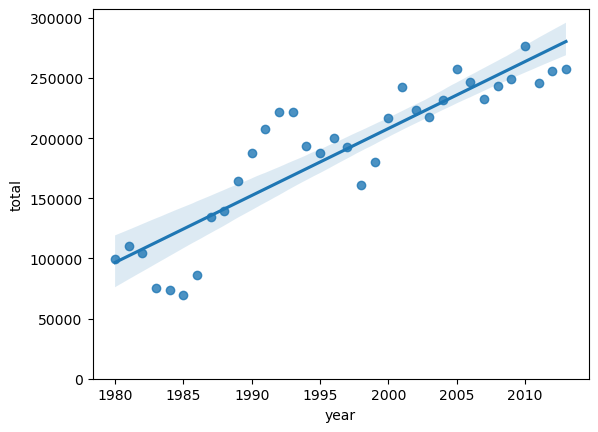

In [25]:
sns.regplot(x = "year", y = "total", data = df_total)
plt.ylim(0,)

We want to integrate geographical data along with the analysis, for that we can use GeoJson

In [26]:
df.head()
df1 = df.reset_index()
df1

,Country,Type,Coverage,Continent,Region,DevName,1980,1981,1982,1983,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,India,Immigrants,Foreigners,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
1,China,Immigrants,Foreigners,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
2,United Kingdom of Great Britain and Northern I...,Immigrants,Foreigners,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
3,Philippines,Immigrants,Foreigners,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
4,Pakistan,Immigrants,Foreigners,Asia,Southern Asia,Developing regions,978,972,1201,900,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,San Marino,Immigrants,Foreigners,Europe,Southern Europe,Developed regions,1,0,0,0,...,0,0,0,0,0,1,0,0,0,5
191,New Caledonia,Immigrants,Foreigners,Oceania,Melanesia,Developing regions,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
192,Marshall Islands,Immigrants,Foreigners,Oceania,Micronesia,Developing regions,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
193,Western Sahara,Immigrants,Foreigners,Africa,Northern Africa,Developing regions,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2


In [27]:
data_world = r'/kaggle/input/geojson/custom.geo.json'

world_map = folium.Map(location = [0,0], zoom_start = 1)

world_map

world_map.choropleth(
geo_data = data_world,
data = df1,
columns = ["Country", "Total"],
key_on = "feature.properties.name",
fill_color = "YlOrRd",
fill_opacity = 0.7,
line_opacity = 0.2,
legend_name = "Immigration to Canada")

world_map